
Risk Type Counts:
--------------------
Flooding: 15 questions
Earthquake: 14 questions
Wildfire: 13 questions
Wind: 13 questions
Winter: 11 questions
Hail: 11 questions


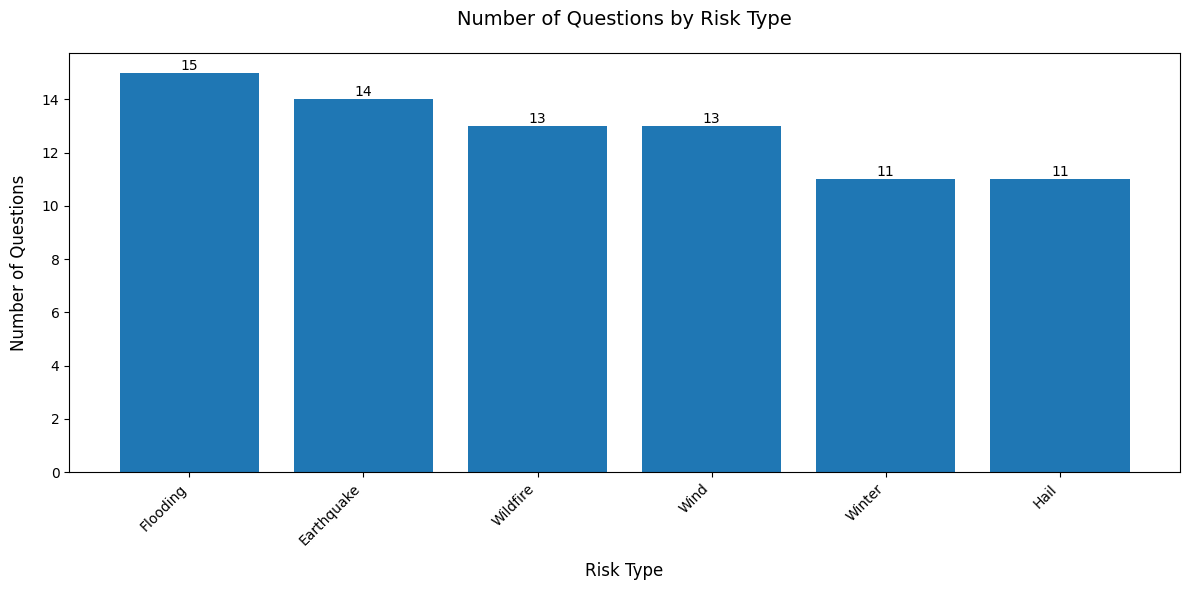

In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import os

# Get the current directory and construct path to risk_questions.json
current_dir = os.path.dirname(os.path.abspath('__file__'))
json_path = os.path.join(current_dir, '../../../core/external/risk_questions.json')

# Read the risk questions file
with open(json_path, 'r') as f:
    data = json.load(f)

# Initialize a counter for risk types
risk_counts = Counter()

# Count occurrences of each risk type
for question in data['risk_questions']:
    for risk in question['risk']:
        risk_counts[risk] += 1

# Sort risks by count for better visualization
sorted_items = risk_counts.most_common()
risks = [item[0] for item in sorted_items]
counts = [item[1] for item in sorted_items]

# Create bar plot with improved styling
plt.figure(figsize=(12, 6))
bars = plt.bar(risks, counts)
plt.title('Number of Questions by Risk Type', pad=20, fontsize=14)
plt.xlabel('Risk Type', labelpad=10, fontsize=12)
plt.ylabel('Number of Questions', labelpad=10, fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()

# Print the counts
print("\nRisk Type Counts:")
print("-" * 20)
for risk, count in sorted_items:
    print(f"{risk}: {count} questions")
